## Implementing ridge regression via gradient descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
def get_numpy_data(data, features, output):
    features = ['constant'] + features # this is how you combine two lists
    # create a new col in dataframe named 'constant'
    data['constant'] = 1 
    
    output_array = data[output].to_numpy()

    feature_matrix = data[features].to_numpy()

    return(feature_matrix, output_array)

In [3]:
def predict_output(feature_matrix, weights):
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [4]:
def feature_derivative_ridge(errors, feature, feature_weight, l2_penalty, feature_is_constant):
    if feature_is_constant == False:
        derivative = 2*np.dot(errors,feature) + 2*l2_penalty*feature_weight
    else:
        derivative = 2*np.dot(errors,feature)
    return derivative

In [5]:
sales = pd.read_csv('kc_house_data.csv')

In [6]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    iterations = 0
    while iterations<max_iterations:
    # compute the predictions using your predict_output() function
    # compute the errors as predictions - output
        errors = predict_output(feature_matrix, weights) - output
        for i in range(len(weights)): # loop over each weight
        # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            feature = feature_matrix[:,i]
            feature_weight = weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature, feature_weight, l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature, feature_weight, l2_penalty, False)
            weights[i] = weights[i] - step_size*derivative
        # subtract the step size times the derivative from the current weight 
        iterations+=1
    return weights

In [7]:
train_data = pd.read_csv('kc_house_train_data.csv')
test_data = pd.read_csv('kc_house_test_data.csv')

In [8]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

First, let’s consider no regularization. Set the L2 penalty to 0.0 and run your ridge regression algorithm to learn the weights of the simple model (described above). Use the following parameters:

In [9]:
step_size = 1e-12
max_iterations = 1000
initial_weights = [0,0]
l2_penalty = 0

In [10]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Next, let’s consider high regularization. Set the L2 penalty to 1e11 and run your ridge regression to learn the weights of the simple model. Use the same parameters as above. Call your weights:

In [11]:
step_size = 1e-12
max_iterations = 1000
initial_weights = [0,0]
l2_penalty = 1e11

In [12]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

If you have access to matplotlib, the following piece of code will plot the two learned models. (The blue line is for the model with no regularization and the red line is for the one with high regularization.)

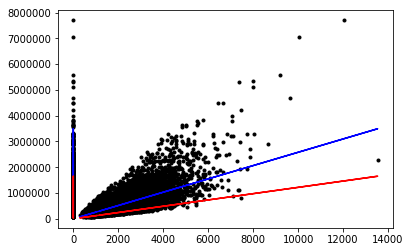

In [13]:

plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

**Quiz Question: What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?**

In [14]:
simple_weights_0_penalty

array([  0, 258])

In [15]:
simple_weights_high_penalty

array([  0, 122])

**Quiz Question: Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?**

Blue line (no regualrization) is steeper

Compute the RSS on the TEST data for the following three sets of weights:

    The initial weights (all zeros)
    The weights learned with no regularization
    The weights learned with high regularization

In [16]:
rss0 = sum((predict_output(simple_test_feature_matrix, [0,0])-test_output)**2)

In [17]:
rss0

1784273286136298.0

In [18]:
rss1 = sum((predict_output(simple_test_feature_matrix, simple_weights_0_penalty)-test_output)**2)
rss1

276345546684986.0

In [19]:
rss2 = sum((predict_output(simple_test_feature_matrix, simple_weights_high_penalty)-test_output)**2)
rss2

710338452729658.0

**Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?** <br>
See above

Let us now consider a model with 2 features: [ ‘sqft_living’, ‘sqft_living_15’]. First, create Numpy version of your training and test data with the two features.

In [20]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

First, let’s consider no regularization. Set the L2 penalty to 0.0 and run your ridge regression algorithm. Use the following parameters:

    initial_weights = all zeros
    step size = 1e-12
    max_iterations = 1000

In [21]:
step_size = 1e-12
max_iterations = 1000
initial_weights = [0,0,0]
l2_penalty = 0

In [22]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [23]:
multiple_weights_0_penalty

array([  0, 172,  96])

Next, let’s consider high regularization. Set the L2 penalty to 1e11 and run your ridge regression to learn the weights of the simple model. Use the same parameters as above. Call your weights:

In [87]:
step_size = 1e-12
max_iterations = 1000
initial_weights = [0,0,0]
l2_penalty = 1e11

In [88]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [89]:
multiple_weights_high_penalty

array([ 0, 69, 60])

**Quiz Question: What is the value of the coefficient for ‘sqft_living’ that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?** <br>

With No Regualarization array([  0, 150, 118]) <br>
WIth Regualrization array([ 0, 69, 60])

 Compute the RSS on the TEST data for the following three sets of weights:

    The initial weights (all zeros)
    The weights learned with no regularization
    The weights learned with high regularization

In [91]:
rss0 = sum((predict_output(test_feature_matrix, [0,0,0])-test_output)**2)
rss0

927913649762512.0

In [92]:
#with no regularization
rss1 = sum((predict_output(test_feature_matrix, [  0, 150, 118])-test_output)**2)
rss1

149392395530356.0

In [93]:
#with regularization
rss2 = sum((predict_output(test_feature_matrix, [ 0, 69, 60])-test_output)**2)
rss2

366990225511138.0

**Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?** <br>
Answered Above


 Predict the house price for the 1st house in the test set using the no regularization and high regularization models. (Remember that python starts indexing from 0.)

In [94]:
predict_output(test_feature_matrix, [  0, 150, 118])

array([565520, 431980, 305080, ..., 763800, 313780, 324280], dtype=int64)

In [95]:
predict_output(test_feature_matrix, [ 0, 69, 60])

array([273810, 206490, 146400, ..., 367650, 151260, 156090], dtype=int64)

 **Quiz Question: What's the error in predicting the price of the first house in the test set using the weights learned with no regularization? What about with high regularization?**

In [96]:
predict_output(test_feature_matrix, [  0, 150, 118]) - test_output

array([242520., -98020., 116080., ..., 155300.,  83780., -90220.])

In [97]:
predict_output(test_feature_matrix, [ 0, 69, 60]) - test_output

array([ -49190., -323510.,  -42600., ..., -240850.,  -78740., -258410.])